### Evidencia 3 - Punto 3

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Principal Component Analysis
from sklearn.decomposition import PCA

In [14]:
features_columns = ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo' ]

#### Importacion Datos y Clean up

In [3]:
data = pd.read_csv('genres_v2.csv', dtype={'song_name': 'str'})
data.dropna()
data = data[data['loudness'] > -20]
data = data[data['speechiness'] < 0.8]

data.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,genre,song_name
0,0.831,0.814,2,-7.364,1,0.4200,0.0598,0.013400,0.0556,0.3890,156.985,audio_features,2Vc6NJ9PW9gD9q343XFRKx,spotify:track:2Vc6NJ9PW9gD9q343XFRKx,https://api.spotify.com/v1/tracks/2Vc6NJ9PW9gD...,https://api.spotify.com/v1/audio-analysis/2Vc6...,124539,4,Dark Trap,Mercury: Retrograde
1,0.719,0.493,8,-7.230,1,0.0794,0.4010,0.000000,0.1180,0.1240,115.080,audio_features,7pgJBLVz5VmnL7uGHmRj6p,spotify:track:7pgJBLVz5VmnL7uGHmRj6p,https://api.spotify.com/v1/tracks/7pgJBLVz5Vmn...,https://api.spotify.com/v1/audio-analysis/7pgJ...,224427,4,Dark Trap,Pathology
2,0.850,0.893,5,-4.783,1,0.0623,0.0138,0.000004,0.3720,0.0391,218.050,audio_features,0vSWgAlfpye0WCGeNmuNhy,spotify:track:0vSWgAlfpye0WCGeNmuNhy,https://api.spotify.com/v1/tracks/0vSWgAlfpye0...,https://api.spotify.com/v1/audio-analysis/0vSW...,98821,4,Dark Trap,Symbiote
3,0.476,0.781,0,-4.710,1,0.1030,0.0237,0.000000,0.1140,0.1750,186.948,audio_features,0VSXnJqQkwuH2ei1nOQ1nu,spotify:track:0VSXnJqQkwuH2ei1nOQ1nu,https://api.spotify.com/v1/tracks/0VSXnJqQkwuH...,https://api.spotify.com/v1/audio-analysis/0VSX...,123661,3,Dark Trap,ProductOfDrugs (Prod. The Virus and Antidote)
4,0.798,0.624,2,-7.668,1,0.2930,0.2170,0.000000,0.1660,0.5910,147.988,audio_features,4jCeguq9rMTlbMmPHuO7S3,spotify:track:4jCeguq9rMTlbMmPHuO7S3,https://api.spotify.com/v1/tracks/4jCeguq9rMTl...,https://api.spotify.com/v1/audio-analysis/4jCe...,123298,4,Dark Trap,Venom


In [4]:
# copia del dataset original
data_original = data.copy()

#### Seleccion de columnas

In [5]:
# clean up unnecessary columns
data = data[features_columns]
data.head()

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0.831,0.814,-7.364,0.4200,0.0598,0.013400,0.0556,0.3890,156.985
1,0.719,0.493,-7.230,0.0794,0.4010,0.000000,0.1180,0.1240,115.080
2,0.850,0.893,-4.783,0.0623,0.0138,0.000004,0.3720,0.0391,218.050
3,0.476,0.781,-4.710,0.1030,0.0237,0.000000,0.1140,0.1750,186.948
4,0.798,0.624,-7.668,0.2930,0.2170,0.000000,0.1660,0.5910,147.988


#### Escalado de los Datos

In [6]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)
data_scaled

array([[ 1.2232804 ,  0.27868656, -0.31456006, ..., -0.9028519 ,
         0.13607453,  0.40009941],
       [ 0.50780313, -1.47415864, -0.26836695, ..., -0.54737973,
        -1.00007021, -1.3583742 ],
       [ 1.344656  ,  0.71007214,  0.57517431, ...,  0.89957428,
        -1.36406527,  2.96259055],
       ...,
       [-1.77916883,  0.3169106 ,  1.15465648, ...,  0.97363098,
        -1.00007021,  0.31407457],
       [-1.03813881,  0.8629683 ,  0.57724266, ..., -0.89202822,
         0.56052106,  0.10874797],
       [-0.70595294,  0.99402214,  0.2032164 , ...,  1.1388344 ,
        -0.95719683,  0.31877447]])

#### Calculo Silhouette

In [7]:
val_silhouette = []
k_groups = range(2,10)

for k in k_groups:
    modelo_kmeans = KMeans(n_clusters=k, n_init=25, random_state=123)
    modelo_kmeans.fit(data_scaled)
    
    cluster_labels = modelo_kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(data_scaled, modelo_kmeans.labels_)
    val_silhouette.append(silhouette_avg)
    print("For n_clusters={0}, the silhouette score is {1}".format(k, silhouette_avg))

For n_clusters=2, the silhouette score is 0.19380880235455955
For n_clusters=3, the silhouette score is 0.17123895721774648
For n_clusters=4, the silhouette score is 0.1776804456124311
For n_clusters=5, the silhouette score is 0.17106181237998436
For n_clusters=6, the silhouette score is 0.17865241692824832
For n_clusters=7, the silhouette score is 0.1752549875374814
For n_clusters=8, the silhouette score is 0.1769891504799181
For n_clusters=9, the silhouette score is 0.16334534874030718


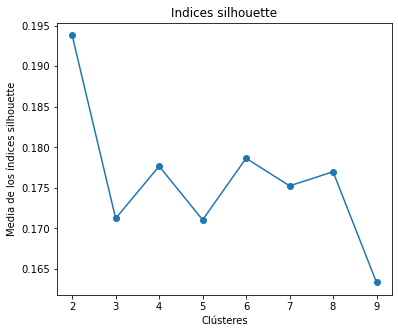

In [8]:
fig, ax = plt.subplots(1, 1, figsize=(6, 5))
ax.plot(k_groups, val_silhouette, marker='o')
ax.set_title("Indices silhouette")
ax.set_xlabel('Clústeres')
ax.set_ylabel('Media de los índices silhouette');

Segun el calculo del Silhouette Score la mejor seleccion de Clusters es de 2 o 6. Se procede a la seleccion de 6 Clusters con K-Means.

#### K-Means

In [9]:
kmeans = KMeans(n_clusters=6, n_init=25, random_state=123)
kmeans.fit(data_scaled)

# create new dataframe with all songs features, the cluster label and the song_name
data_kmeans = pd.DataFrame(data_scaled.copy(), index=data.index, columns=data.columns)
data_kmeans['cluster_label'] = kmeans.predict(data_scaled)
data_kmeans['song_name'] = data_original['song_name']

In [10]:
data_kmeans.head()

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,cluster_label,song_name
0,1.223280,0.278687,-0.314560,2.291794,-0.211013,-0.727414,-0.902852,0.136075,0.400099,3,Mercury: Retrograde
1,0.507803,-1.474159,-0.268367,-0.455052,1.798267,-0.763556,-0.547380,-1.000070,-1.358374,4,Pathology
2,1.344656,0.710072,0.575174,-0.592959,-0.481901,-0.763545,0.899574,-1.364065,2.962591,2,Symbiote
3,-1.044527,0.098488,0.600339,-0.264725,-0.423601,-0.763556,-0.570166,-0.781416,1.657447,2,ProductOfDrugs (Prod. The Virus and Antidote)
4,1.012470,-0.758823,-0.419356,1.267574,0.714716,-0.763556,-0.273940,1.002117,0.022555,3,Venom


In [44]:
data_kmeans[data_kmeans['song_name']=='Pathology']

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,cluster_label,song_name
1,0.507803,-1.474159,-0.268367,-0.455052,1.798267,-0.763556,-0.54738,-1.00007,-1.358374,4,Pathology


In [16]:
def get_euclidean_distance(data_points, point, features_columns):
    result_df = data_points.copy()
    result_df['distance'] = np.linalg.norm(data_points[features_columns].sub(np.array(point[features_columns])), axis=1)
    return result_df 
    

In [42]:
def song_recommendation_system(song_name):
    
    # get user song data already classified
    user_data = data_kmeans[ data_kmeans['song_name'] == song_name ]
    user_data = data_original[ data_original['song_name'] == song_name ]
    
    if len(user_data) == 0:
        return "No Recomendation Found"
    
    
    # just get the first element in case more than one record with the same song_name is found
    user_data = user_data.head(1)
    
    user_data = user_data[features_columns]
    #user_scaled = scaler.fit_transform(user_data[features_columns].to_numpy())
    
    user_scaled = scaler.fit_transform(user_data.values.reshape(-1, 1)).T
    
    print(user_scaled)
    
    
    result = kmeans.predict(user_scaled)
    
    print(result)
    
    return None

    # get user song data cluster number
    user_data_cluster_num = user_data['cluster_label'].values[0]
    

    # filter all songs base on user song cluster predicted
    data_cluster = data_kmeans[data_kmeans['cluster_label'] == user_data_cluster_num]
    
    # remove records with the same song name
    data_cluster = data_kmeans[data_kmeans['song_name'] != song_name]
    

    # calculate euclidean distance between all points and user data point
    result_df = get_euclidean_distance(data_cluster, user_data, features_columns)
    
    
    # order result base on distance ascending
    result_df = result_df.sort_values(by='distance', ascending=True)
    
        
    # return the 5 elements with minimum distance to the user data point
    return result_df['song_name'].iloc[:5].values.tolist()


#### Recomendacion

In [45]:
recomendation_result = song_recommendation_system('Pathology')
recomendation_result

[[-0.31493142 -0.32113169 -0.53301068 -0.33247872 -0.32365569 -0.33465705
  -0.33141974 -0.33125513  2.82254013]]
[[ 7.1900e-01  4.9300e-01 -7.2300e+00  7.9400e-02  4.0100e-01  0.0000e+00
   1.1800e-01  1.2400e-01  1.1508e+02]]
[3]


In [14]:
recomendation_result = song_recommendation_system('Kybalion')
recomendation_result

['Drumn',
 'Sleep Walk',
 'Sleep Walk',
 'CharacterSelect (ВыборПерсонажа)',
 'Paris']

In [15]:
recomendation_result = song_recommendation_system('1 Thing (feat. Eve) - Radio Version')
recomendation_result

['1 Thing', 'Order', 'Fuck Forgivness', 'FASTER', 'Ready 2 Die']

In [16]:
recomendation_result = song_recommendation_system('Bittersweet')
recomendation_result

['What', 'Beep', 'Insecure', 'Mood Swing Misery', 'Mood Swing Misery']